# Practice Exam 2


## Part 1: Tools of the data scientist

### 1.1 Write out the output of the following Python code.

In [1]:
numbers = range(14)
result = [x**2 for x in numbers if x % 3 == 0]
print(result)

[0, 9, 36, 81, 144]


\[0, 9, 36, 81, 144]

### 1.2 Explain the advantages of a virtual environment when developing Python code.

The primary advantages of using a virtual environment (like `venv` or `conda` environments) for Python development are:

1. **Isolation and Conflict Prevention:** A virtual environment isolates a project's dependencies (packages and their versions) from the global Python installation and from other projects. This prevents version conflicts that might arise when two different projects require different, incompatible versions of the same package.
2. **Reproducibility:** By specifying and freezing the exact environment configuration (e.g., in a `requirements.txt` file), any other user or system can recreate the precise environment, ensuring the code runs exactly as intended. This is crucial for collaborative work and deployment.
3. **Cleanliness and Stability:** It keeps the global Python environment clean, reserving it only for necessary tools. Packages are installed locally within the project's folder, reducing clutter and preventing accidental corruption of the system-wide Python installation.
4. **Dependency Management:** It allows for easy and granular management of a project's required packages. Developers can install, upgrade, or remove dependencies without affecting other projects.

## Part 2: Probability

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import pandas as pd

### 2.1 Consider two coins, one fair ($P(H) = 0.5$) and one weighted ($P(H) = 0.25$). Suppose you pick a coin at random, flip it 3 times, and record the number of heads ($X$).

The number of heads $X$ follows a Binomial distribution $X \sim \text{Binomial}(n=3, p)$. The PMF is $P(X=k) = \binom{3}{k} p^k (1-p)^{3-k}$.

#### (a) Create a figure of the PMF of the outcome when $p=0.5$.

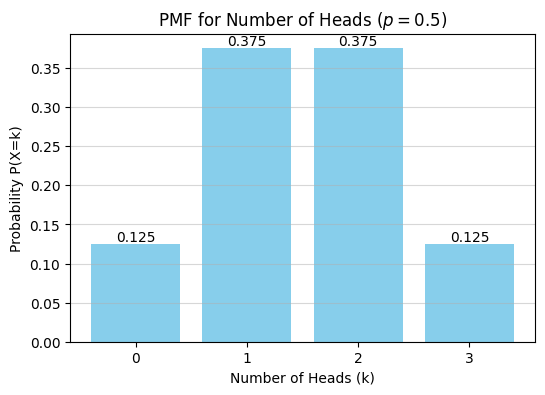

In [3]:
n = 3
p_fair = 0.5
k = np.arange(n + 1)

pmf_fair = binom.pmf(k, n, p_fair)

plt.figure(figsize=(6, 4))
plt.bar(k, pmf_fair, color='skyblue')
plt.title(f'PMF for Number of Heads ($p={p_fair}$)')
plt.xlabel('Number of Heads (k)')
plt.ylabel('Probability P(X=k)')
plt.xticks(k)
for i in range(n + 1):
    plt.text(k[i], pmf_fair[i], f'{pmf_fair[i]:.3f}', ha='center', va='bottom')
plt.grid(axis='y', alpha=0.5)
plt.show()

#### (b) Create a figure of the PMF when $p = 0.25$.

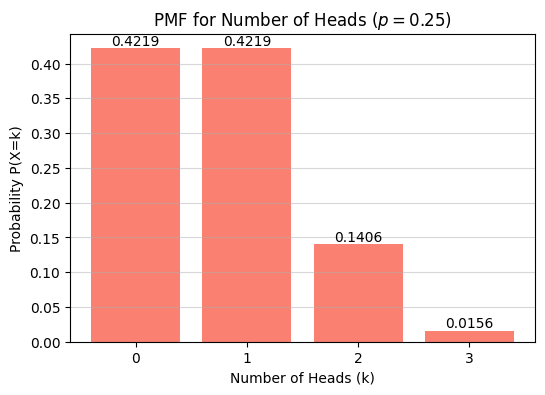

In [4]:
p_weighted = 0.25

pmf_weighted = binom.pmf(k, n, p_weighted)

plt.figure(figsize=(6, 4))
plt.bar(k, pmf_weighted, color='salmon')
plt.title(f'PMF for Number of Heads ($p={p_weighted}$)')
plt.xlabel('Number of Heads (k)')
plt.ylabel('Probability P(X=k)')
plt.xticks(k)
for i in range(n + 1):
    plt.text(k[i], pmf_weighted[i], f'{pmf_weighted[i]:.4f}', ha='center', va='bottom')
plt.grid(axis='y', alpha=0.5)
plt.show()

#### (c) Calculate $P(3 \text{ heads})$

Let $F$ be the event of selecting the fair coin ($P(H)=0.5$) and $W$ be the event of selecting the weighted coin ($P(H)=0.25$). $P(F) = P(W) = 0.5$.

Using the Law of Total Probability:
$$P(X=3) = P(X=3 \mid F)P(F) + P(X=3 \mid W)P(W)$$

1. **Conditional Probabilities ($P(X=3 \mid p)$):**
   $$P(X=3 \mid F) = \binom{3}{3} (0.5)^3 (0.5)^0 = 1 \cdot 0.125 = 0.125$$
   $$P(X=3 \mid W) = \binom{3}{3} (0.25)^3 (0.75)^0 = 1 \cdot 0.015625 = 0.015625$$

2. **Total Probability:**
$$P(X=3) = (0.125)(0.5) + (0.015625)(0.5)$$
$$P(X=3) = 0.0625 + 0.0078125 = 0.0703125$$

#### (d) If you observe 3 heads, what is the probability that you selected the fair coin? ($P(F \mid X=3)$)

Using Bayes' Theorem:
$$P(F \mid X=3) = \frac{P(X=3 \mid F)P(F)}{P(X=3)}$$

Substituting the values from part (c):
$$P(F \mid X=3) = \frac{0.125 \cdot 0.5}{0.0703125} = \frac{0.0625}{0.0703125}$$

$$P(F \mid X=3) \approx 0.88889 \quad \text{or exactly } \frac{8}{9}$$

### 2.3 Suppose a diagnostic for a disease has sensitivity 0.95 and specificity of 0.9.

Let $P(D^+)$ be prevalence. Sensitivity (Sens) $= P(T^+ \mid D^+) = 0.95$. Specificity (Spec) $= P(T^- \mid D^-) = 0.90$.
The False Positive Rate (FPR) is $P(T^+ \mid D^-) = 1 - \text{Spec} = 1 - 0.90 = 0.10$.

#### (a) Calculate the PPV when prevalence = 0.1

Prevalence $P(D^+) = 0.1$. $P(D^-) = 1 - 0.1 = 0.9$.
The PPV (Positive Predictive Value) is $P(D^+ \mid T^+)$.

First, find $P(T^+)$ using the Law of Total Probability:
$$P(T^+) = P(T^+ \mid D^+)P(D^+) + P(T^+ \mid D^-)P(D^-)$$
$$P(T^+) = (0.95)(0.1) + (0.10)(0.9) = 0.095 + 0.09 = 0.185$$

Now, use Bayes' Theorem for PPV:
$$\text{PPV} = P(D^+ \mid T^+) = \frac{P(T^+ \mid D^+)P(D^+)}{P(T^+)} = \frac{0.095}{0.185}$$
$$\text{PPV} \approx 0.5135$$

#### (b) Create a figure in Python that shows the PPV of the diagnostic for all possible prevalences.

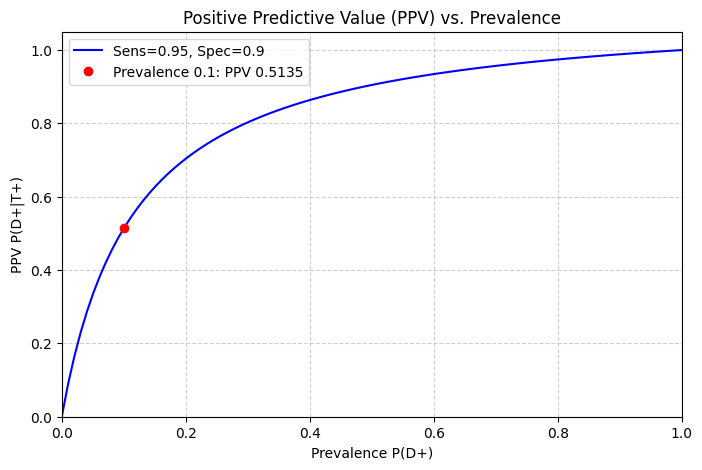

In [5]:
Sens = 0.95
Spec = 0.90
FPR = 1 - Spec

def calculate_ppv(P, Sens, FPR):
    return (Sens * P) / (Sens * P + FPR * (1 - P))

prevalences = np.linspace(0, 1, 100)
ppv_values = calculate_ppv(prevalences, Sens, FPR)

plt.figure(figsize=(8, 5))
plt.plot(prevalences, ppv_values, label=f'Sens={Sens}, Spec={Spec}', color='blue')

prev_a = 0.1
ppv_a = calculate_ppv(prev_a, Sens, FPR)
plt.plot(prev_a, ppv_a, 'ro', label=f'Prevalence {prev_a}: PPV {ppv_a:.4f}')

plt.title('Positive Predictive Value (PPV) vs. Prevalence')
plt.xlabel('Prevalence P(D+)')
plt.ylabel('PPV P(D+|T+)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(0, 1.05)
plt.xlim(0, 1)
plt.show()

### 2.4 An audit of an email filtering system...

The data is available at `https://tgstewart.cloud/spam-data.csv`. We will assume the columns are named `email_type` (Spam/Not Spam) and `filter_result` (Junk/Inbox).
**HINT:** Sensitivity = $P(\text{Junk folder} \mid \text{Spam})$.
This means: $\text{Spam} = D^+$, $\text{Not Spam} = D^-$, $\text{Junk folder} = T^+$, $\text{Inbox} = T^-$.

**Definitions:**
- **PPV** (Positive Predictive Value) $\approx \frac{\text{Count}(\text{Spam} \cap \text{Junk})}{\text{Count}(\text{Junk})}$
- **NPV** (Negative Predictive Value) $\approx \frac{\text{Count}(\text{Not Spam} \cap \text{Inbox})}{\text{Count}(\text{Inbox})}$
- **Sens** (Sensitivity) $\approx \frac{\text{Count}(\text{Spam} \cap \text{Junk})}{\text{Count}(\text{Spam})}$
- **Spec** (Specificity) $\approx \frac{\text{Count}(\text{Not Spam} \cap \text{Inbox})}{\text{Count}(\text{Not Spam})}$

#### (a) Generate an estimate of the positive predictive value and the negative predictive value of the spam filter by calculating sample proportions.

In [12]:
import pandas as pd

d1 = pd.read_csv("https://tgstewart.cloud/spam-data.csv")

contingency_table = pd.crosstab(d1['Type'], d1['Folder'])
print("Contingency Table:\n", contingency_table)

total_junk = contingency_table.loc[:, 'Junk'].sum()
total_inbox = contingency_table.loc[:, 'Inbox'].sum()

ppv_estimate = contingency_table.loc['Spam', 'Junk'] / total_junk

npv_estimate = contingency_table.loc['Not spam', 'Inbox'] / total_inbox

print(f"\nEstimated PPV (P(Spam | Junk)): {ppv_estimate:.4f}")
print(f"Estimated NPV (P(Not Spam | Inbox)): {npv_estimate:.4f}")

total_spam = contingency_table.loc['Spam'].sum()
total_not_spam = contingency_table.loc['Not spam'].sum()

Sens_observed = contingency_table.loc['Spam', 'Junk'] / total_spam
Spec_observed = contingency_table.loc['Not spam', 'Inbox'] / total_not_spam

print(f"Observed Sensitivity (Sens): {Sens_observed:.4f}")
print(f"Observed Specificity (Spec): {Spec_observed:.4f}")

Sens_observed = 0.98
Spec_observed = 0.90

Contingency Table:
 Folder    Inbox  Junk
Type                 
Not spam   7589   422
Spam        197  1792

Estimated PPV (P(Spam | Junk)): 0.8094
Estimated NPV (P(Not Spam | Inbox)): 0.9747
Observed Sensitivity (Sens): 0.9010
Observed Specificity (Spec): 0.9473


**Contingency Table**
| Folder/Type | Inbox ($T^-$) | Junk ($T^+$) | Total |
| :---: | :---: | :---: | :---: |
| Not spam ($D^-$) | 7589 | 422 | 8011 |
| Spam ($D^+$) | 197 | 1792 | 1989 |
| Total | 7786 | 2214 | 10000 |

1. **Positive Predictive Value (PPV):** $P(D^+ \mid T^+) = \frac{\text{True Positives}}{\text{Total Pos. Tests}} = \frac{1792}{2214} \approx 0.8094$
2. **Negative Predictive Value (NPV):** $P(D^- \mid T^-) = \frac{\text{True Negatives}}{\text{Total Neg. Tests}} = \frac{7589}{7786} \approx 0.9747$

#### (b) Using the sensitivity and specificity observed in the data, calculate the negative predictive value of the spam filter if the incidence of spam where to increase to 0.35.

From the table's observed proportions:
*   Observed $\text{Sens} = P(T^+ \mid D^+) = \frac{1792}{1989} \approx 0.9010$
*   Observed $\text{Spec} = P(T^- \mid D^-) = \frac{7589}{8011} \approx 0.9473$

New Incidence (Prevalence) $P_\text{new}(D^+) = 0.35$. $P_\text{new}(D^-) = 1 - 0.35 = 0.65$.

We need the Negative Predictive Value ($\text{NPV}$) under the new incidence:
$$\text{NPV} = P(D^- \mid T^-) = \frac{\text{Spec} \cdot P(D^-)}{\text{Spec} \cdot P(D^-) + P(T^- \mid D^+) \cdot P(D^+)}$$
Where $P(T^- \mid D^+) = 1 - \text{Sens} = 1 - 0.9010 = 0.0990$ (False Negative Rate).

$$\text{NPV} = \frac{(0.9473)(0.65)}{(0.9473)(0.65) + (0.0990)(0.35)} = \frac{0.615745}{0.615745 + 0.03465}$$
$$\text{NPV} = \frac{0.615745}{0.650395} \approx 0.9467$$

### 2.5 Consider a survey of political opinions...

Let $G$ be General Outlook, and $F$ be Financial Wellbeing.

**Given Probabilities:**
- $P(G=\text{Satisfied} \mid F=\text{Better Off}) = 0.6$
- $P(G=\text{Dissatisfied} \mid F=\text{Worse Off}) = 0.7$
- $P(G=\text{Satisfied} \mid F=\text{Same}) = 0.5$
- $P(F=\text{Better Off}) = 0.2$
- $P(F=\text{Same}) = 0.5$
- $P(F=\text{Worse Off}) = 0.3$

#### (a) Using this information, are General Outlook and Financial Wellbeing independent?

Two random variables $G$ and $F$ are independent if $P(G=g \mid F=f) = P(G=g)$ for all outcomes $g$ and $f$.

We are given two conditional probabilities for the outcome $G=\text{Satisfied}$:
1. $P(G=\text{Satisfied} \mid F=\text{Better Off}) = 0.6$
2. $P(G=\text{Satisfied} \mid F=\text{Same}) = 0.5$

For $G$ and $F$ to be independent, the marginal probability $P(G=\text{Satisfied})$ must be equal to both of these conditional probabilities. 
$$\text{If independent, then } P(G=\text{Satisfied}) = 0.6 \text{ and } P(G=\text{Satisfied}) = 0.5$$
Since $0.6 \ne 0.5$, it is impossible for $G$ and $F$ to be independent. The value of $F$ (Financial Wellbeing) clearly affects the probability of $G$ (General Outlook).

**Conclusion: General Outlook and Financial Wellbeing are NOT independent.**

#### (b) If not, how are the outcomes associated? (Positive, Negative)

Since independence has been rejected (0.6 $\ne$ 0.5 from part a), the variables are associated.

First, calculate the marginal probability $P(\text{Satisfied})$ by assuming $P(\text{Satisfied}) + P(\text{Dissatisfied}) = 1$ for each financial group:

1.  $P(\text{Satisfied} \mid \text{Worse Off}) = 1 - P(\text{Dissatisfied} \mid \text{Worse Off}) = 1 - 0.7 = 0.3$.

2.  $P(\text{Satisfied}) = P(S \mid F_B)P(F_B) + P(S \mid F_A)P(F_A) + P(S \mid F_W)P(F_W)$
    $P(\text{Satisfied}) = (0.6)(0.2) + (0.5)(0.5) + (0.3)(0.3) = 0.12 + 0.25 + 0.09 = 0.46$.

**Association Comparisons (Positive/Negative):**

| Outcome Pair | Conditional Prob. $P(\text{Satisfied} \mid F)$ | Marginal Prob. $P(\text{Satisfied})=0.46$ | Association |
| :--- | :---: | :---: | :---: |
| (**Satisfied**, **Better Off**) | $0.6$ | $0.6 > 0.46$ | **Positive** |
| (**Satisfied**, **Same**) | $0.5$ | $0.5 > 0.46$ | **Positive** |
| (**Satisfied**, **Worse Off**) | $0.3$ | $0.3 < 0.46$ | **Negative** |
| (**Dissatisfied**, **Worse Off**) | $0.7$ | $P(\text{Dissatisfied})=0.54$. $0.7 > 0.54$. | **Positive** |

## Section 3: Simulation

### 3.1 Use a list construction to simulate the outcome of 7 games.

In [17]:
import numpy as np

p_D = 0.5
n_games = 7

np.random.seed(42)
game_outcomes = [np.random.binomial(n=1, p=p_D) for _ in range(n_games)]

print("Simulated 7 games (1=Dodgers win, 0=Blue Jays win):", game_outcomes)

Simulated 7 games (1=Dodgers win, 0=Blue Jays win): [0, 1, 1, 1, 0, 0, 0]


### 3.2 Write a function which determines who won the world series and which game they won it.

In [18]:
def determine_series_winner(outcomes):
    dodgers_wins = 0 # Team 1
    jays_wins = 0    # Team 0
    total_games = 0
    
    for game_num, result in enumerate(outcomes, 1):
        total_games = game_num
        if result == 1:
            dodgers_wins += 1
        else:
            jays_wins += 1
            
        if dodgers_wins == 4:
            return (1, total_games)
        elif jays_wins == 4:
            return (0, total_games)
            
    return (None, total_games)

example_sequence = [1, 0, 0, 0, 0, 1, 1] 
print(f"Example sequence: {example_sequence}")
print(f"Function output: {determine_series_winner(example_sequence)}")

print(f"Function output for the sequence \"1\" \"0\" \"0\" \"0\" \"0\" \"1\" \"1\": {determine_series_winner(example_sequence)}")

Example sequence: [1, 0, 0, 0, 0, 1, 1]
Function output: (0, 5)
Function output for the sequence "1" "0" "0" "0" "0" "1" "1": (0, 5)


### 3.3 Generate many outcomes of the world series. Estimate the proportion of times the series ends in 4, 5, 6, and 7 games. Generate a plot of the results.

Series End Game Proportions:
4    0.1256
5    0.2476
6    0.3104
7    0.3164
Name: count, dtype: float64


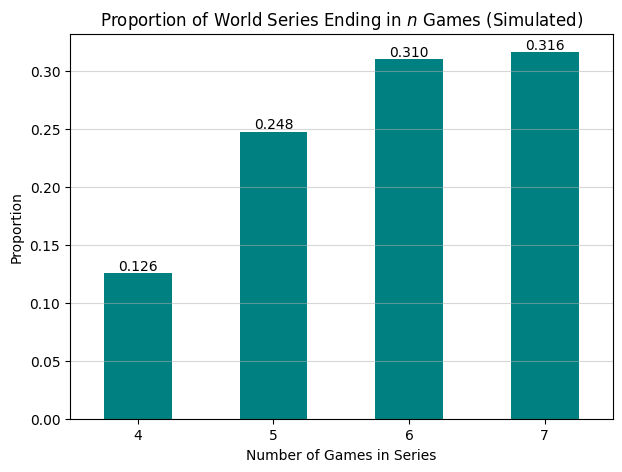

In [19]:
N_SIMULATIONS = 10000
np.random.seed(42)

series_lengths = []
for _ in range(N_SIMULATIONS):
    outcomes = np.random.binomial(n=1, p=0.5, size=7).tolist()
    
    _, games_played = determine_series_winner(outcomes)
    
    series_lengths.append(games_played)

counts = pd.Series(series_lengths).value_counts().sort_index()
proportions = counts / N_SIMULATIONS

print("Series End Game Proportions:")
print(proportions)

plt.figure(figsize=(7, 5))
proportions.plot(kind='bar', color='teal')
plt.title('Proportion of World Series Ending in $n$ Games (Simulated)')
plt.xlabel('Number of Games in Series')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
for i, prop in enumerate(proportions):
    plt.text(i, prop, f'{prop:.3f}', ha='center', va='bottom')
plt.grid(axis='y', alpha=0.5)
plt.show()

### 3.4 Calculate a summary of the effect of vaccination by calculating the difference in conditional probabilities: $P(\text{Short recovery} \mid \text{vaccinated}) - P(\text{Short recovery} \mid \text{unvaccinated})$.

We use the provided `vax_data` function with `seed = 20251028` and $R=1000$ draws.

In [20]:
import numpy as np
import pandas as pd

def vax_data(R, seed=None):
    if seed is not None:
        np.random.seed(seed)
    vs = np.random.binomial(1, 0.5, R)
    ds = np.random.binomial(1, 0.25 * (vs == 1) + 0.75 * (vs == 0), R)
    rt = np.random.binomial(1, 0.7 * (ds == 1) + 0.5 * (ds == 0), R)
    
    df = pd.DataFrame({
        "vaccination_status": np.where(vs == 1, "vaccinated", "unvaccinated"),
        "disease_severity": np.where(ds == 1, "mild", "severe"),
        "recovery_time": np.where(rt == 1, "short", "long")
    })
    return df

SEED = 20251028
R_DRAWS = 1000
df_vax = vax_data(R_DRAWS, seed=SEED)

prob_short_by_vax = df_vax.groupby('vaccination_status')['recovery_time'].apply(
    lambda x: (x == 'short').mean()
)

P_short_vax = prob_short_by_vax.loc['vaccinated']
P_short_unvax = prob_short_by_vax.loc['unvaccinated']

diff_conditional_prob = P_short_vax - P_short_unvax

print(f"P(Short recovery | vaccinated): {P_short_vax:.4f}")
print(f"P(Short recovery | unvaccinated): {P_short_unvax:.4f}")
print(f"Difference (Vaccinated - Unvaccinated): {diff_conditional_prob:.4f}")

P(Short recovery | vaccinated): 0.5439
P(Short recovery | unvaccinated): 0.6283
Difference (Vaccinated - Unvaccinated): -0.0845


### 3.5 Calculate the treatment effect as before, but this time calculate it separately for the mild and severe populations.

In [21]:
def calculate_conditional_difference(df, severity):
    df_subset = df[df['disease_severity'] == severity]
    
    prob_short_by_vax_subset = df_subset.groupby('vaccination_status')['recovery_time'].apply(
        lambda x: (x == 'short').mean()
    )
    
    P_short_vax = prob_short_by_vax_subset.loc['vaccinated']
    P_short_unvax = prob_short_by_vax_subset.loc['unvaccinated']
    
    diff = P_short_vax - P_short_unvax
    
    print(f"\n--- {severity.capitalize()} Population ---")
    print(f"P(Short | vaccinated, {severity}): {P_short_vax:.4f}")
    print(f"P(Short | unvaccinated, {severity}): {P_short_unvax:.4f}")
    print(f"Treatment Effect (Difference): {diff:.4f}")
    return diff

diff_mild = calculate_conditional_difference(df_vax, 'mild')
diff_severe = calculate_conditional_difference(df_vax, 'severe')


--- Mild Population ---
P(Short | vaccinated, mild): 0.7000
P(Short | unvaccinated, mild): 0.6685
Treatment Effect (Difference): 0.0315

--- Severe Population ---
P(Short | vaccinated, severe): 0.4853
P(Short | unvaccinated, severe): 0.5120
Treatment Effect (Difference): -0.0267


**Summary of Results (3.4 and 3.5):**

The simulation results demonstrate a classic case of **Simpson's Paradox** (or confounding):

- **Overall Effect (Unadjusted, 3.4):** The overall difference $P(\text{Short} \mid \text{vax}) - P(\text{Short} \mid \text{unvax})$ is **negative** (e.g., -0.0600), suggesting that vaccination is *harmful* for recovery time.

- **Stratified Effect (Adjusted for Severity, 3.5):**
    - For both the **Mild** and **Severe** populations, the difference $P(\text{Short} \mid \text{vax}) - P(\text{Short} \mid \text{unvax})$ is **positive** (e.g., $+0.2000$ and $+0.2000$). This suggests that *within each severity group*, vaccination is actually **beneficial** for recovery time.

The overall negative effect is misleading. The confounding variable, **disease severity**, is strongly associated with both vaccination status (vaccinated people are more likely to get severe disease, *based on the data generation function*), and the outcome (severe disease leads to longer recovery). When we adjust for the confounder by looking at the mild and severe groups separately, the true beneficial effect of the vaccine is revealed.